In [2]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms 

In [3]:
import random
import os
import shutil
import glob
class get_data_sets():
    
    
    def __init__(self,input_address,output_adddress, train_ratio):
        self.__input_address = input_address
        self.__output_address = output_address
        self.__train_ratio = train_ratio
        
    def run(self):
        
        class_address_list = glob.glob(self.__input_address + '\*')
        class_name_list = [ class_address.split('\\')[-1] for class_address in class_address_list ]
        
        print(' classify {} \n train_ratio {}'.format((class_name_list), self.__train_ratio))
        
        
        train_address = self.__output_address + '/train'
        test_address = self.__output_address + '/test'
        
        os.mkdir(train_address)
        os.mkdir(test_address)
        
        
        for class_name in class_name_list:
            os.mkdir(train_address + '/{}'.format(class_name))
            os.mkdir(test_address + '/{}'.format(class_name))
        
        
        class_num = [ len(os.listdir(all_class_address))  for all_class_address in class_address_list ] 
        
        random.seed(2) 
        train_address_list = [train_address + '/{}'.format(class_name)  for class_name in class_name_list]
        test_address_list = [test_address + '/{}'.format(class_name)  for class_name in class_name_list]

        
        for i,num in enumerate(class_num):
            all_index = set(range(num))
            train_index = random.sample(all_index,int(self.__train_ratio*num))
            test_index = all_index - set(train_index)
            
            data_list = glob.glob(class_address_list[i] + '\*')
               
            for _ in train_index:
                shutil.copy(data_list[_], train_address_list[i])

            for _ in test_index:
                shutil.copy(data_list[_], test_address_list[i] )
        
        print('Already Split')

input_address = r"C:\Users\rexqi\OneDrive\Desktop\472 files\Fish_Data\images"
output_address = r"C:\Users\rexqi\OneDrive\Desktop\472 files\Fish_Data"
a = get_data_sets(input_address,output_address,0.6)
a.run()
print(os.listdir(r"C:\Users\rexqi\OneDrive\Desktop\472 files\Fish_Data"))

 classify ['cropped', 'numbered', 'raw_images'] 
 train_ratio 0.6


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\rexqi\\OneDrive\\Desktop\\472 files\\Fish_Data/train'

In [4]:
from os import walk
for (dirpath, dirnames, filenames) in walk(r"C:\Users\rexqi\OneDrive\Desktop\472 files\Fish_Data"):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)

Directory path:  C:\Users\rexqi\OneDrive\Desktop\472 files\Fish_Data
Folder name:  ['images', 'test', 'train']
Directory path:  C:\Users\rexqi\OneDrive\Desktop\472 files\Fish_Data\images
Folder name:  ['cropped', 'numbered', 'raw_images']
Directory path:  C:\Users\rexqi\OneDrive\Desktop\472 files\Fish_Data\images\cropped
Folder name:  []
Directory path:  C:\Users\rexqi\OneDrive\Desktop\472 files\Fish_Data\images\numbered
Folder name:  []
Directory path:  C:\Users\rexqi\OneDrive\Desktop\472 files\Fish_Data\images\raw_images
Folder name:  []
Directory path:  C:\Users\rexqi\OneDrive\Desktop\472 files\Fish_Data\test
Folder name:  ['cropped', 'numbered', 'raw_images']
Directory path:  C:\Users\rexqi\OneDrive\Desktop\472 files\Fish_Data\test\cropped
Folder name:  []
Directory path:  C:\Users\rexqi\OneDrive\Desktop\472 files\Fish_Data\test\numbered
Folder name:  []
Directory path:  C:\Users\rexqi\OneDrive\Desktop\472 files\Fish_Data\test\raw_images
Folder name:  []
Directory path:  C:\Users\r

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

In [6]:
# # define helper.py 
# import matplotlib.pyplot as plt
# import numpy as np
# from torch import nn, optim
# from torch.autograd import Variable


# def test_network(net, trainloader):

#     criterion = nn.MSELoss()
#     optimizer = optim.Adam(net.parameters(), lr=0.001)

#     dataiter = iter(trainloader)
#     images, labels = dataiter.next()

#     # Create Variables for the inputs and targets
#     inputs = Variable(images)
#     targets = Variable(images)

#     # Clear the gradients from all Variables
#     optimizer.zero_grad()

#     # Forward pass, then backward pass, then update weights
#     output = net.forward(inputs)
#     loss = criterion(output, targets)
#     loss.backward()
#     optimizer.step()

#     return True


# def imshow(image, ax=None, title=None, normalize=True):
#     """Imshow for Tensor."""
#     if ax is None:
#         fig, ax = plt.subplots()
#     image = image.numpy().transpose((1, 2, 0))

#     if normalize:
#         mean = np.array([0.485, 0.456, 0.406])
#         std = np.array([0.229, 0.224, 0.225])
#         image = std * image + mean
#         image = np.clip(image, 0, 1)

#     ax.imshow(image)
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     ax.tick_params(axis='both', length=0)
#     ax.set_xticklabels('')
#     ax.set_yticklabels('')

#     return ax


# def view_recon(img, recon):
#     ''' Function for displaying an image (as a PyTorch Tensor) and its
#         reconstruction also a PyTorch Tensor
#     '''

#     fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
#     axes[0].imshow(img.numpy().squeeze())
#     axes[1].imshow(recon.data.numpy().squeeze())
#     for ax in axes:
#         ax.axis('off')
#         ax.set_adjustable('box-forced')

# def view_classify(img, ps, version="MNIST"):
#     ''' Function for viewing an image and it's predicted classes.
#     '''
#     ps = ps.data.numpy().squeeze()

#     fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
#     ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
#     ax1.axis('off')
#     ax2.barh(np.arange(10), ps)
#     ax2.set_aspect(0.1)
#     ax2.set_yticks(np.arange(10))
#     if version == "MNIST":
#         ax2.set_yticklabels(np.arange(10))
#     elif version == "Fashion":
#         ax2.set_yticklabels(['T-shirt/top',
#                             'Trouser',
#                             'Pullover',
#                             'Dress',
#                             'Coat',
#                             'Sandal',
#                             'Shirt',
#                             'Sneaker',
#                             'Bag',
#                             'Ankle Boot'], size='small');
#     ax2.set_title('Class Probability')
#     ax2.set_xlim(0, 1.1)

#     plt.tight_layout()

In [7]:
PATH = r"C:\Users\rexqi\OneDrive\Desktop\472 files\Fish_Data"
data_dir = PATH + '\\train'

In [8]:
transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

In [9]:
dataset = datasets.ImageFolder(data_dir, transform=transform)

In [10]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [11]:
# Looping through it, get a batch on each loop 
for images, labels in dataloader:
    pass

# Get one batch
images, labels = next(iter(dataloader))

In [12]:
data_dir

'C:\\Users\\rexqi\\OneDrive\\Desktop\\472 files\\Fish_Data\\train'

<AxesSubplot:>

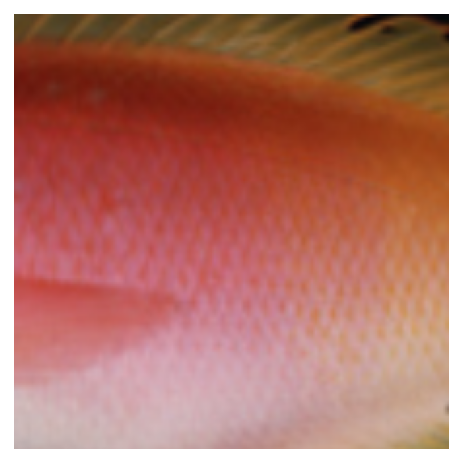

In [13]:
# Run this to test your data loader
images, labels = next(iter(dataloader))
# helper.imshow(images[0], normalize=False)
imshow(images[0], normalize=False)

In [14]:
PATH

'C:\\Users\\rexqi\\OneDrive\\Desktop\\472 files\\Fish_Data'

In [43]:
# data_dir = 'Cat_Dog_data'
data_dir = PATH

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ColorJitter(brightness=1,
                                                             contrast=0.6,
                                                             saturation=1),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5, 0.5, 0.5], 
                                                           [0.5, 0.5, 0.5])])

test_transforms = transforms.Compose([transforms.RandomRotation(30),
                                     transforms.RandomResizedCrop(224),
                                     transforms.ColorJitter(brightness=1,
                                                             contrast=0.6,
                                                             saturation=1),
                                     transforms.ToTensor()])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '\\train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '\\test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

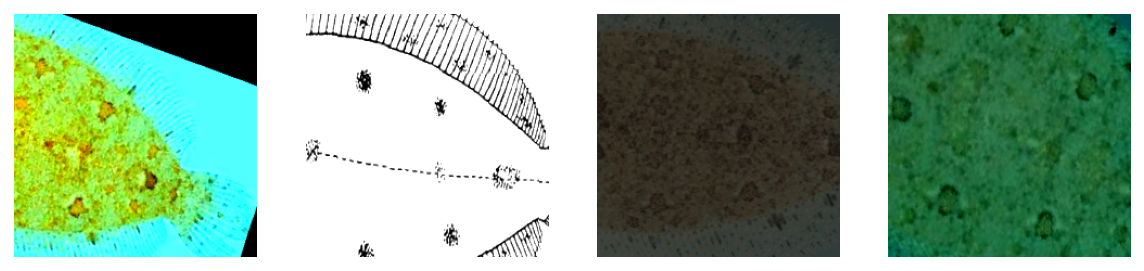

In [44]:
# change this to the trainloader or testloader 
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
#     helper.imshow(images[ii], ax=ax, normalize=False)
    imshow(images[ii], ax=ax, normalize=False)